In [4]:
import os
import glob
import matplotlib.pyplot as plt
import pydicom
import numpy as np
import skimage

In [6]:
test_dir = "/Users/thor/Documenti/QUIBIM TFM/ProstateX/Prostatex_train/PROSTATEx _train copia/ProstateX-0001/07-08-2011-MR prostaat kanker detectie WDSmc MCAPRODETW-95738/6-t2tsetra-76610"
directorio = os.chdir(test_dir)


all_slices = os.listdir(test_dir)
listall_slices = list(all_slices)
print(listall_slices)

print("Number of DICOM files:", len(all_slices))

['000018.dcm', '000009.dcm', '000008.dcm', '000005.dcm', '000011.dcm', '000010.dcm', '000004.dcm', '000012.dcm', '000006.dcm', '000007.dcm', '000013.dcm', '000017.dcm', '000003.dcm', '000002.dcm', '000016.dcm', '000000.dcm', '000014.dcm', '000015.dcm', '000001.dcm']
Number of DICOM files: 19


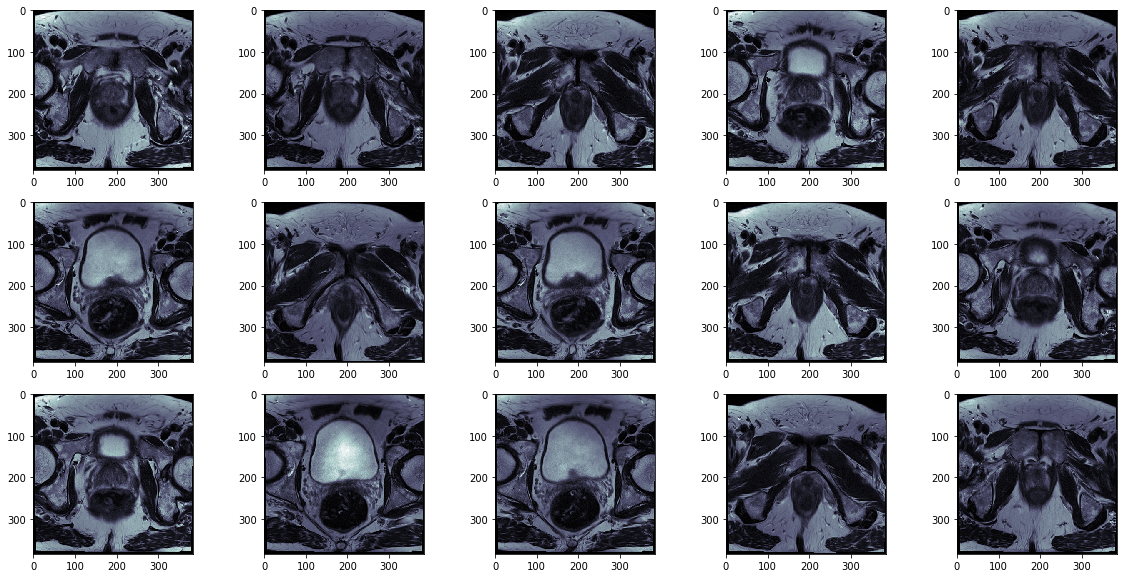

In [7]:
fig, axs = plt.subplots(3, 5, figsize=(20, 10))
for file_name,ax in zip(listall_slices[0:21],axs.flatten()): 
    file_path = os.path.join(test_dir, file_name)
    ds_test = pydicom.dcmread(file_path) # read dicom image
    ax.imshow(ds_test.pixel_array, cmap=plt.cm.bone)
    
pixel = ds_test.pixel_array.shape[0]

In [8]:
def plotnoise(img, mode, r, c, i,var = 0.10):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode,var=var)
        plt.imshow(gimg,cmap=plt.cm.bone)
    else:
        plt.imshow(img,cmap=plt.cm.bone)
    plt.title(mode)
    plt.axis("off")

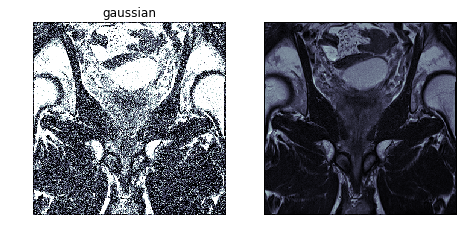

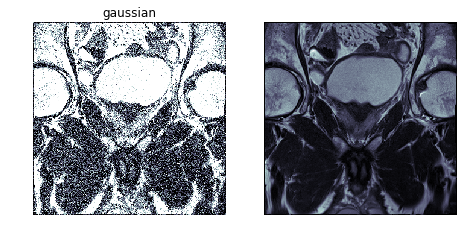

In [6]:
for file_name in listall_slices[0:2]:
    plt.figure(figsize=(20,20))
    r=4
    c=5
    file_path = os.path.join(test_dir, file_name)
    ds_test = pydicom.dcmread(file_path) # read dicom image
    img = ds_test.pixel_array/(ds_test.pixel_array.shape[0]) #Normalizar pixeles
    plotnoise(img, "gaussian", r,c,1)
    plotnoise(img, None, r,c,2)
    plt.show()

In [ ]:
#Guardar imagenes con ruido gauss alpha=0.10

In [9]:
imagen_Gauss = []
contador = 0
for file_name in listall_slices: 
    file_path = os.path.join(test_dir, file_name)
    ds_test = pydicom.dcmread(file_path) # read dicom image
    img = ds_test.pixel_array/(ds_test.pixel_array.shape[0]) #Normalizar pixeles
    gimg = skimage.util.random_noise(img, mode="gaussian",var=0.10)
    imagen_Gauss.append(gimg)
    contador = contador+1
    #print (contador)

imagenes = np.array(imagen_Gauss)

In [10]:
#CODIGO MIO
import numpy as np
np.save('imagenes', '/Users/thor/Documenti/QUIBIM TFM')

In [ ]:
#cargar las fotos con ruido gaussiano alpha = 0.10 y pintar las 5 primeras

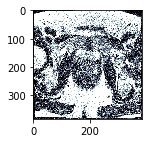

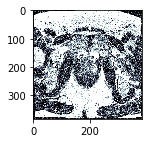

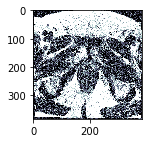

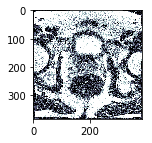

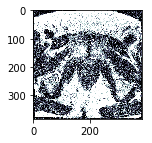

In [11]:
np.save('test_gauss_0.10', imagenes)
prueba = np.load('test_gauss_0.10.npy')

prueba1 = prueba[0:5,:,:]

for i in prueba[0:5,:,:]:
    plt.figure(figsize=(2,2))
    plt.imshow(i,cmap=plt.cm.bone)
    plt.show()
  

In [31]:
np.save('/Users/thor/Documenti/QUIBIM TFM/NOISE_DICOM_TEST', prueba1)
np.load('/Users/thor/Documenti/QUIBIM TFM/NOISE_DICOM_TEST.npy')

array([[[0.        , 0.        , 0.60783571, ..., 0.        ,
         0.24153573, 0.        ],
        [0.02839246, 0.        , 0.        , ..., 0.        ,
         0.        , 0.00843991],
        [0.        , 0.10319473, 0.55651164, ..., 0.24686222,
         0.        , 0.28145948],
        ...,
        [0.        , 0.        , 0.46642283, ..., 0.10048588,
         0.10888471, 0.        ],
        [0.637137  , 0.1958428 , 0.0825344 , ..., 0.        ,
         0.        , 0.        ],
        [0.43278858, 0.31986457, 0.07482164, ..., 0.09723356,
         0.        , 0.15887572]],

       [[0.        , 0.12634438, 0.        , ..., 0.1942078 ,
         0.14532691, 0.06771275],
        [0.0931394 , 0.        , 0.46508048, ..., 0.17363888,
         0.        , 0.        ],
        [0.05313341, 0.34507525, 0.53955765, ..., 0.33944705,
         0.        , 0.09260115],
        ...,
        [0.        , 0.02611052, 0.        , ..., 0.07405367,
         0.        , 0.18004282],
        [0. 

In [33]:
#from skimage.io import imsave
#imsave('Path_to_your_folder/test_Gauss_noise.jpg',imagenes)

In [35]:
from PIL import Image

In [ ]:
np.save('test_gauss_0.10', imagenes)
prueba = np.load('test_gauss_0.10.npy')

prueba1 = prueba[0:5,:,:]

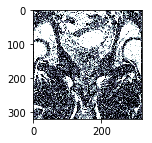

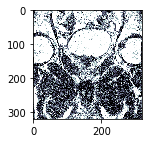

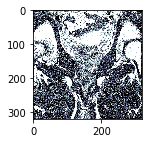

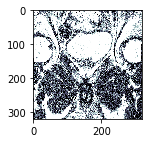

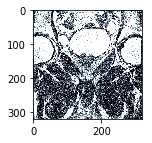

OSError: cannot write mode F as JPEG

In [39]:
for i in prueba[0:5,:,:]:
    plt.figure(figsize=(2,2))
    plt.imshow(i,cmap=plt.cm.bone)
    plt.show()
    
    
im = Image.fromarray(i)
im.save("test_gauss_0.10.jpeg")
  



In [ ]:
#im = Image.fromarray(i)
#im.save("your_file.jpeg")